# An Analysis of News Head Lines
# Part 1: Data Collection
### Noah Minshew

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

---

News headlines are very important and can make a huge impact on the success of the article and ultimately the outlet. A lot of readers skim headlines to either gather the information they want or find articles they would like to read. What can we find if we explore headlines from the top news outlets in the United States? 

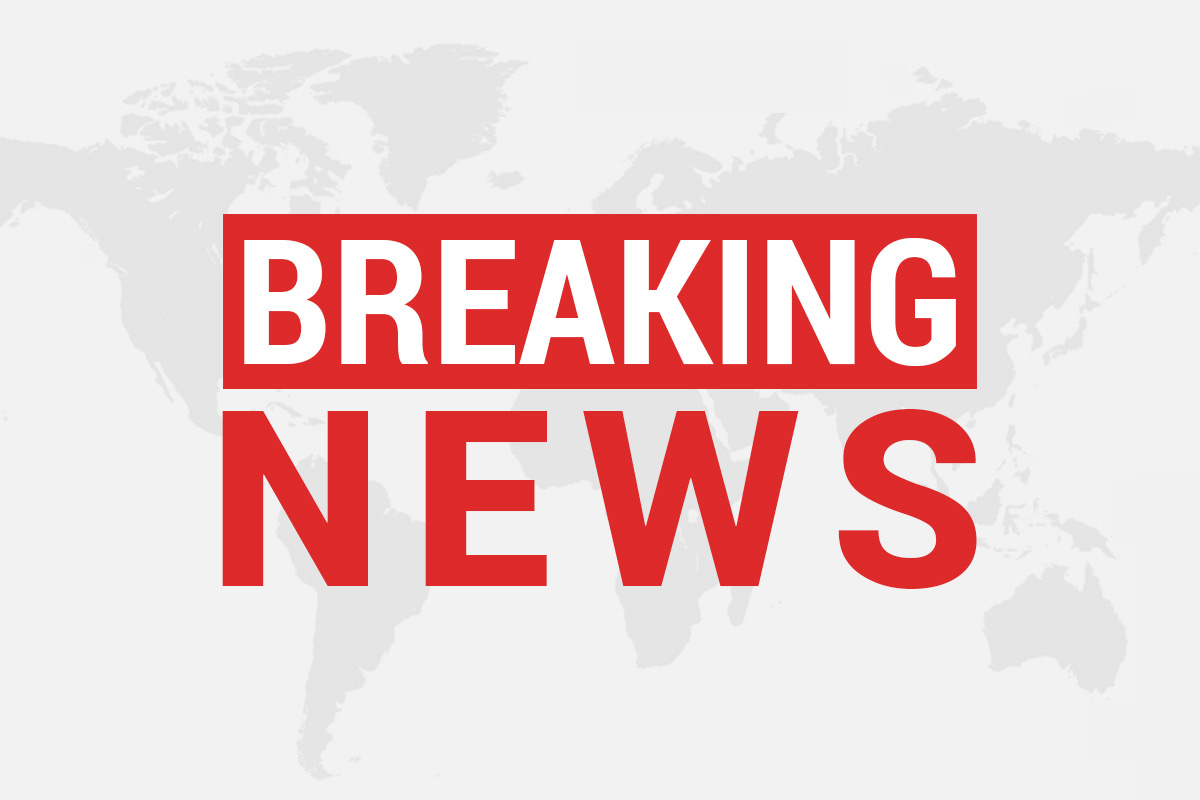

In [1]:
from IPython.display import Image
Image("images/news.jpg")

## Business Questions
* How are events portrayed/framed by different news sources? 
* Do news headlines tend to be positive or negative? Why?
* What are the most popular topics across all top news outlets in the US?
* How do outlets use headlines to attract certain types of readers? (Liberal/Conservative)
* Can word pairs (bigrams) create a network of headlines?
* Can we find clusters for categories, outlets, political biases, etc...?  

## Install and Import Packages
---

* Register for News API account
 * You will first need to go to https://newsapi.org/ and register for an account
 * After registering you will get your API keys which we will need later
* Install news api python library
 * $ pip install newsapi-python

Now Lets Import some of the packages we will need

In [2]:
#news api
from newsapi import NewsApiClient
#CSV
import csv
from collections import Counter

#pandas
import pandas as pd

#Matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

#numpy
import numpy as np

# nltk
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#regular expression
import re

#seaborn
import seaborn as sns

## Data Collection

In [3]:
#use the api key for news api here
api = NewsApiClient(api_key='663e9a967c034962aa80f8f6d32fc423')

In [4]:
#command to get all available sources (parameters I set are country = us and language = en)
sources = api.get_sources(country = 'us', language = 'en')

In [5]:
#news api output is in dictionary format
#assign the data we want to variables
source_ids = [ T['id'] for T in sources['sources']]
source_names = [ T['name'] for T in sources['sources']]
urls = [ T['url'] for T in sources['sources']]

In [6]:
#list of sources from our query
source_ids

['abc-news',
 'al-jazeera-english',
 'ars-technica',
 'associated-press',
 'axios',
 'bleacher-report',
 'bloomberg',
 'breitbart-news',
 'business-insider',
 'buzzfeed',
 'cbs-news',
 'cnbc',
 'cnn',
 'crypto-coins-news',
 'engadget',
 'entertainment-weekly',
 'espn',
 'espn-cric-info',
 'fortune',
 'fox-news',
 'fox-sports',
 'google-news',
 'hacker-news',
 'ign',
 'mashable',
 'medical-news-today',
 'msnbc',
 'mtv-news',
 'national-geographic',
 'national-review',
 'nbc-news',
 'new-scientist',
 'newsweek',
 'new-york-magazine',
 'next-big-future',
 'nfl-news',
 'nhl-news',
 'politico',
 'polygon',
 'recode',
 'reddit-r-all',
 'reuters',
 'techcrunch',
 'techradar',
 'the-american-conservative',
 'the-hill',
 'the-huffington-post',
 'the-new-york-times',
 'the-next-web',
 'the-verge',
 'the-wall-street-journal',
 'the-washington-post',
 'the-washington-times',
 'time',
 'usa-today',
 'vice-news',
 'wired']

#### We want an equal balance of conservative and liberal news sources:
* The pew research center published an article on the ideological placement of News Source’s Audience
 * Reference: http://www.journalism.org/2014/10/21/political-polarization-media-habits/pj_14-10-21_mediapolarization-08/
* We will use this to create our conserative and liberal categories

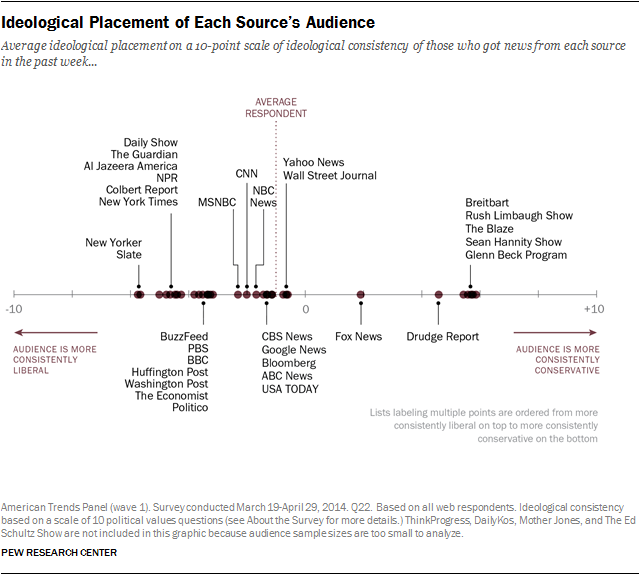

In [7]:
from IPython.display import Image
Image("images/sources.png")

We want an equal balance of  5 conservative and 5 liberal news sources:
* Conservative
 * breitbart-news
 * fox-news
 * national-review
 * the-american-conservative
 * the-washington-times
* Liberal:
 * cnn
 * the-new-york-times
 * the-washington-post
 * the-huffington-post
 * msnbc

In [8]:
#varibles to hold the names of our sources
conservative = ('breitbart-news, fox-news, national-review, the-american-conservative, the-washington-times')
liberal = ('cnn, the-new-york-times, the-washington-post, the-huffington-post, msnbc')
allsources = ('breitbart-news', 'fox-news', 'national-review', 'the-american-conservative', 'the-washington-times', 'cnn', 'the-new-york-times', 'the-washington-post', 'the-huffington-post', 'msnbc')

#### The News API offers two methods of collecting news articles:
* newsapi.get_top_headlines
 * This endpoint provides live top and breaking headlines for a country, specific category in a country, single source, or multiple sources. 
 * Parameters: country, category, sources, q (keywords), pagesize (number of results per page), page
* newsapi.get_everything
 * Search through millions of articles from over 30,000 large and small news sources and blogs. This includes breaking news as well as lesser articles.
 * Parameters: q (keywords), sources, domains, from, to, langauge, sortBy, pageSize, page

We will be using the get everthing method. This is because we want to collect as many articles from our sources as possible. The newsapi will let us get all articles published over the last month. 

Find out more information here: https://newsapi.org/docs/endpoints

The get_everything request returns pages of 20 restults. This means we will need to write a script to go through each page of the results. There is also a limit of 10,000 results per query, so we will run a seperate query for each source in order to get the most articles

In [10]:
#varible for source urls
urls = ('breitbart.com', 'foxnews.com','nationalreview.com', 'theamericanconservative.com', \
        'washingtontimes.com', 'ccn.com', 'nytimes.com', 'washingtonpost.com',\
        'huffingtonpost.com', 'msnbc.com')

In [11]:
allsources

('breitbart-news',
 'fox-news',
 'national-review',
 'the-american-conservative',
 'the-washington-times',
 'cnn',
 'the-new-york-times',
 'the-washington-post',
 'the-huffington-post',
 'msnbc')

In [12]:
urls

('breitbart.com',
 'foxnews.com',
 'nationalreview.com',
 'theamericanconservative.com',
 'washingtontimes.com',
 'ccn.com',
 'nytimes.com',
 'washingtonpost.com',
 'huffingtonpost.com',
 'msnbc.com')

The get_everything request returns pages of 20 restults (up to 100 if you set page_size parameter). This means we will need to write a script to go through each page of the results. There is also a limit of 10,000 results per query, so we will run a seperate query for each source in order to get the most articles. 

We will attempt to collect 10,000 headlines from each news source. Using 100 resultts  per page and 100 pages for eeach source. 

The attributes that we want from each article are: Description, id, url, title, and publishedAt

In [60]:
#we can set the api key again
api = NewsApiClient(api_key='09ee7da63e4242558ad932bafaefbee5')

In [26]:
#breitbart-news, breitbart.com 
breitbart = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'breitbart.com', sources = 'breitbart-news', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            breitbart.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [28]:
df_breitbart = pd.DataFrame(breitbart)

In [29]:
df_breitbart.to_csv('data/df_breitbart.csv')

In [33]:
#fox-news, foxnews.com
foxnews = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'foxnews.com', sources = 'fox-news', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            foxnews.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [34]:
df_foxnews = pd.DataFrame(foxnews)

In [35]:
df_foxnews.to_csv('data/df_foxnews.csv')

In [36]:
#national-review, nationalreview.com
nationalreview = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'nationalreview.com', sources = 'national-review', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            nationalreview.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [37]:
df_nr = pd.DataFrame(nationalreview)

In [38]:
df_nr.to_csv('data/df_nr.csv')

In [43]:
#the-american-conservative, theamericanconservative.com
americanconservative = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'theamericanconservative.com', sources = 'the-american-conservative', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            americanconservative.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [44]:
df_ac = pd.DataFrame(americanconservative)
df_ac.to_csv('data/df_ac.csv')

In [45]:
#the-washington-times, washingtontimes.com
washington_times = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'washingtontimes.com', sources = 'the-washington-times', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            washington_times.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [46]:
df_wt = pd.DataFrame(washington_times)
df_wt.to_csv('data/df_wt.csv')

In [49]:
#cnn, ccn.com
cnn = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'cnn.com', sources = 'cnn', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            cnn.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [50]:
df_cnn = pd.DataFrame(cnn)
df_cnn.to_csv('data/df_cnn.csv')

In [51]:
#the-new-york-times, nytimes.com
nyt = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'nytimes.com', sources = 'the-new-york-times', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            nyt.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [52]:
df_nyt = pd.DataFrame(nyt)
df_nyt.to_csv('data/df_nyt.csv')

In [55]:
# the-washington-post, washingtonpost.com
wp = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'washingtonpost.com', sources = 'the-washington-post', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            wp.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [56]:
df_wp = pd.DataFrame(wp)
df_wp.to_csv('data/df_wp.csv')

In [57]:
#the-huffington-post, huffingtonpost.com
hp = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'huffingtonpost.com', sources = 'the-huffington-post', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            hp.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [58]:
df_hp = pd.DataFrame(hp)
df_hp.to_csv('data/df_hp.csv')

In [61]:
#msnbc, msnbc.com
msnbc = []
for pages in range(1, 101):
    try:
        headlines = api.get_everything(domains = 'msnbc.com', sources = 'msnbc', page_size=100,
                                       page = pages, language='en', sort_by='popularity')
        for i in headlines['articles']:
            msnbc.append([i['description'], i['source']['id'], i['url'], i['title'], i['publishedAt']])
    except:
        print('bad json')

bad json


In [62]:
df_msnbc = pd.DataFrame(msnbc)
df_msnbc.to_csv('data/df_msnbc.csv')

Our datasets are:
* Conservative
 * breitbart-news: df_breitbart
 * fox-news: df_foxnews
 * national-review: df_nr
 * the-american-conservative: df_ac
 * the-washington-times: df_wt
* Liberal:
 * cnn: df_cnn
 * the-new-york-times: df_nyt
 * the-washington-post: df_wp
 * the-huffington-post: df_hp
 * msnbc: df_msnbc 

#### Create dataframes with everything

In [63]:
#all
df = df_breitbart.append([df_foxnews, df_nr, df_ac, df_wt, df_cnn, df_nyt, df_wp, df_hp, df_msnbc])

In [64]:
#all conservative
df_c = df_breitbart.append([df_foxnews, df_nr, df_ac, df_wt])

In [65]:
#all liberal
df_l = df_cnn.append([df_nyt, df_wp, df_hp, df_msnbc])

In [69]:
#rename dataframe columns
df = df.rename(columns={0:'description', 1:'source', 2:'url', 3: 'title', 4: 'date'})
df_c = df_l.rename(columns={0:'description', 1:'source', 2:'url', 3: 'title', 4: 'date'})
df_l = df_l.rename(columns={0:'description', 1:'source', 2:'url', 3: 'title', 4: 'date'})


In [70]:
#save to csv
df.to_csv('data/allheadlines.csv')
df_c.to_csv('data/conservative.csv')
df_l.to_csv('data/liberal.csv')

In [71]:
df.head()

,description,source,url,title,date
0,Liberal activist and filmmaker Michael Moore j...,breitbart-news,http://www.breitbart.com/big-hollywood/2018/03...,Michael Moore Hammers Media for Obsessive Cove...,2018-03-20T10:22:37Z
1,Cartel violence in Tijuana continues with no e...,breitbart-news,http://www.breitbart.com/texas/2018/04/21/11-k...,TIJUANA: 11 Killed in 24 Hours...,2018-04-21T17:04:39Z
2,Actor Michael Rapaport launched into an obscen...,breitbart-news,http://www.breitbart.com/big-hollywood/2018/02...,Actor attacks in obscenity-filled rant...,2018-02-19T15:04:38Z
3,"Fewer people are watching baseball now, than a...",breitbart-news,http://www.breitbart.com/sports/2018/04/02/bas...,Baseball Viewership Lowest in Decade...,2018-04-02T14:34:37Z
4,California’s terrible commuter rail service sp...,breitbart-news,http://www.breitbart.com/california/2018/04/16...,California Trains Running Even Slower Due to H...,2018-04-16T14:04:39Z


In [73]:
df.describe()

,description,source,url,title,date
count,64188,64384,64384,64382,64384
unique,56294,10,58284,57476,56416
top,"Comics - Washington Post comics, Tom Toles, Cu...",cnn,https://www.cnn.com/2018/02/14/opinions/ioc-sh...,Happy Hour Roundup,2018-04-13T09:00:01Z
freq,156,9900,4,64,11


### Continued in Part 2 Notebook